In [17]:
from qiskit.circuit.library import CPhaseGate, QFT
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit.visualization import plot_distribution
import numpy as np

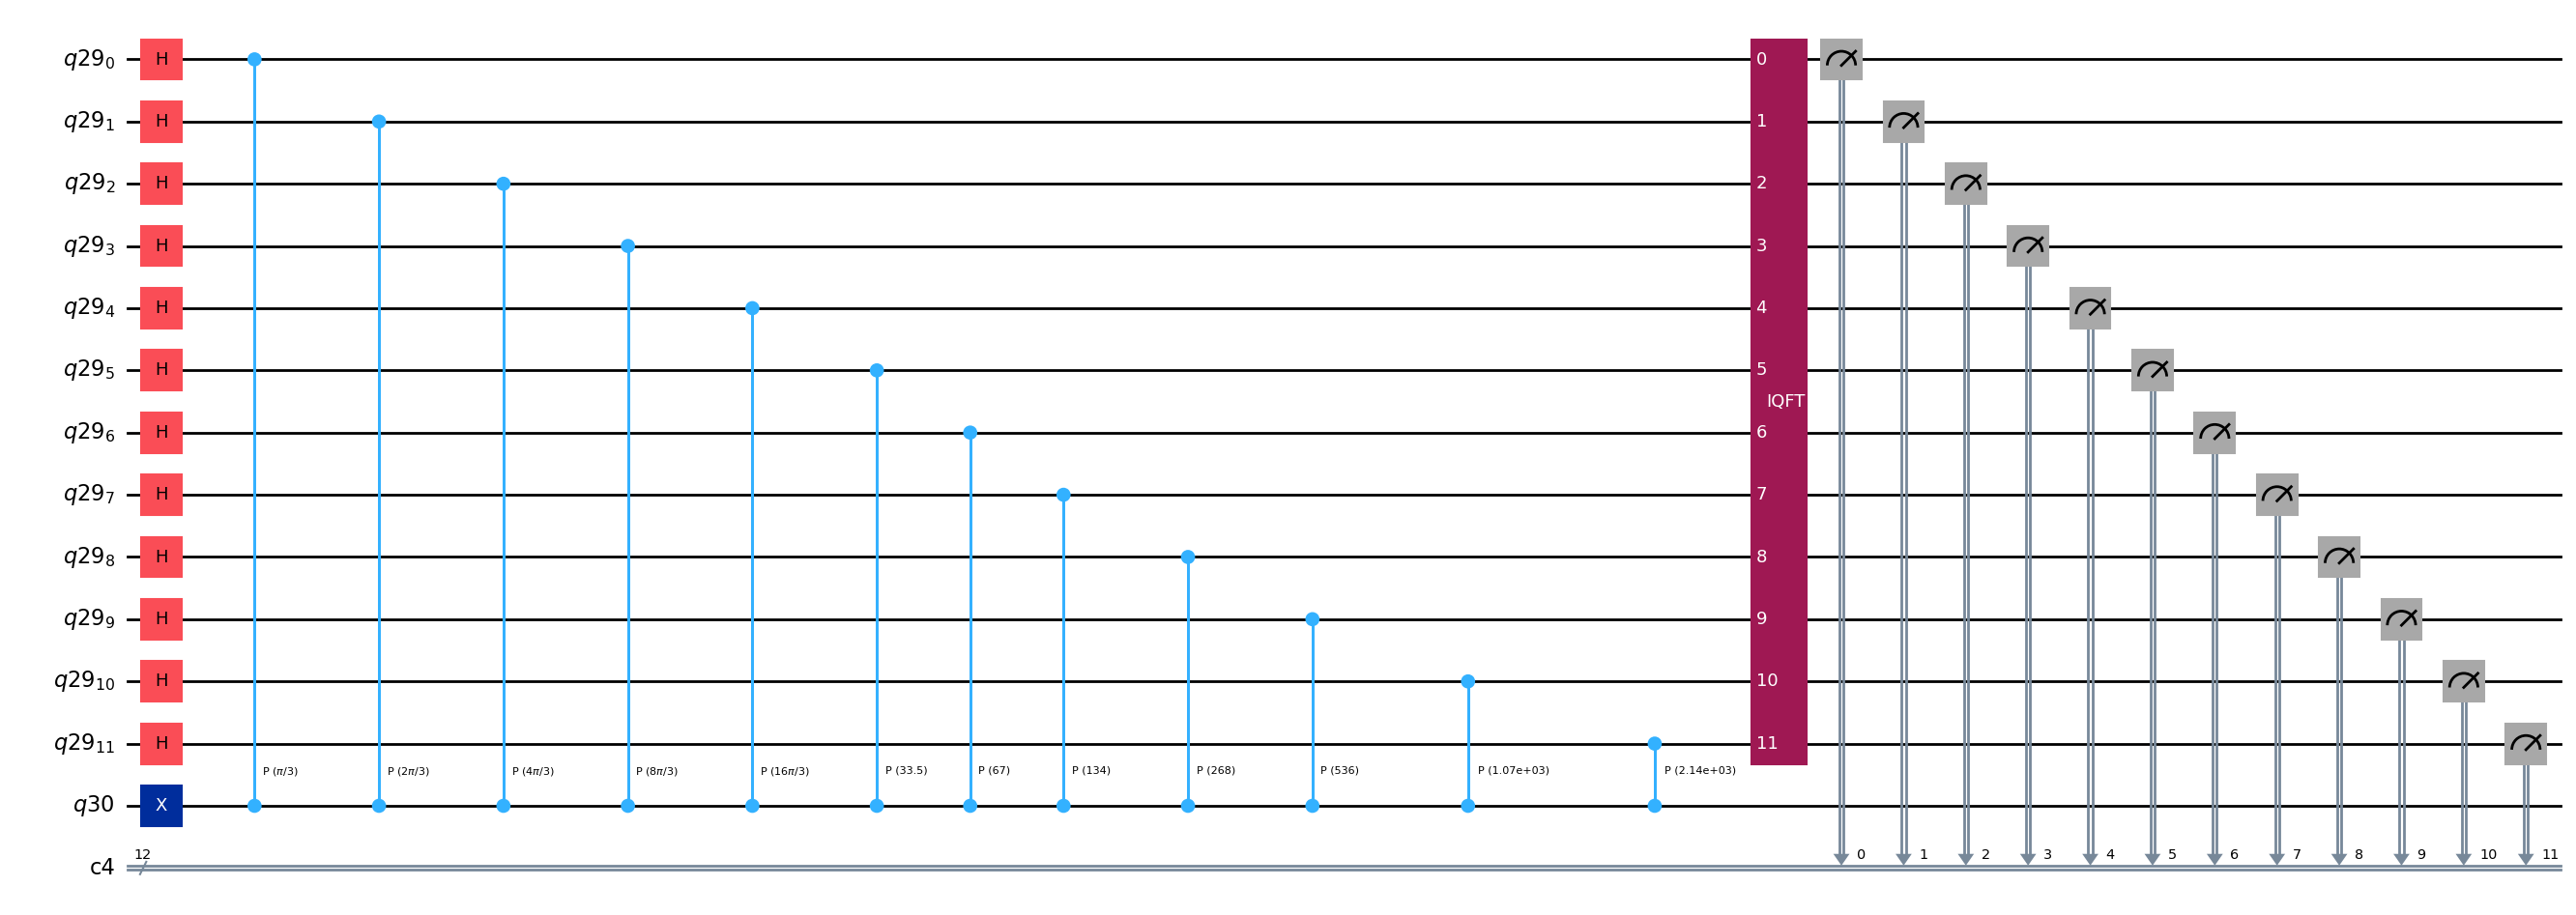

In [18]:
# theta belongs to [0, 1)
# the approximation is taken modulo 1
#   if theta is 1 the approximation is 0
theta = 1 / 6
U = CPhaseGate(2 * np.pi * theta)

ancilla = 12
aqreg = QuantumRegister(ancilla)
sqreg = QuantumRegister(1)
creg = ClassicalRegister(ancilla)
qc = QuantumCircuit(aqreg, sqreg, creg)

qc.h(aqreg)
qc.x(sqreg)  # eigenstate of the phase gate
for i in range(ancilla):
    qc.append(U.power(2**i), [aqreg[i], sqreg[0]])
qc.append(QFT(ancilla).inverse(), aqreg)
qc.measure(aqreg, creg)

qc.draw(output="mpl", fold=-1)

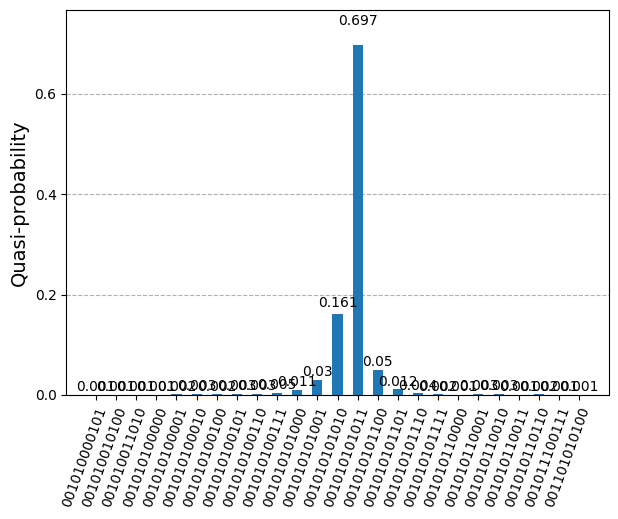

In [19]:
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
job = simulator.run(transpiled_qc, shots=1024)
counts = job.result().get_counts()
plot_distribution(counts)

In [20]:
# phase estimation
highest_probability_outcome = max(counts, key=counts.get)
print("Measured:", highest_probability_outcome)
result = int(highest_probability_outcome, 2) / 2**ancilla
print(
    "Using %d qubits with theta = %.5f, estimated_theta = %.5f."
    % (ancilla, theta, result)
)

Measured: 001010101011
Using 12 qubits with theta = 0.16667, estimated_theta = 0.16675.
